# 環境準備

## 安裝快樂版函式庫

In [ ]:
# 先檢查是否存在 HappyML 這個資料夾，若沒有，則下載
import os

if not os.path.isdir("HappyML"):
  os.system("git clone https://github.com/cnchi/HappyML.git")

# 資料集前處理

## 載入資料集

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

## 切分自變數與應變數

In [ ]:
import HappyML.preprocessor as pp

# Decomposition
import pandas as pd
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
Y = pd.DataFrame(dataset.target, columns=["Price"])

## 切分訓練集、測試集與特徵縮放

In [ ]:
# Split Training vs. Testing Data
X_train, X_test, Y_train, Y_test = pp.split_train_test(X, Y, train_size=0.8)

# Feature Scaling (Optional)
X_train, X_test = pp.feature_scaling(fit_ary=X_train, transform_arys=(X_train, X_test))

# 建構神經網路

## 建構神經網路各層級

In [ ]:
from tensorflow.keras.models import Sequential  #管道
from tensorflow.keras.layers import Dense    #神經網路層(layer)，裡面有神經元

# Add Layers with .add() function
model = Sequential()

# Using Formula #2, Instance=20640, alpha=5
model.add(Dense(input_dim=X_train.shape[1], units=459, kernel_initializer="glorot_normal", activation="relu")) #第一隱藏層
model.add(Dense(units=9, kernel_initializer="glorot_normal", activation="relu"))
model.add(Dense(units=1, kernel_initializer="glorot_normal", activation="linear"))

## 神經網路編譯

In [ ]:
# Compile the whole Neural Networks
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# 模型訓練與校正

## 模型訓練

In [ ]:
# Training (Fit)
epochs_metrics = model.fit(x=X_train, y=Y_train, validation_split=0.2, batch_size=5, epochs=50)

Epoch 1/50
2642/2642 [==============================] - 16s 4ms/step - loss: 0.4843 - mse: 0.4843 - val_loss: 0.3750 - val_mse: 0.3750
Epoch 2/50
2642/2642 [==============================] - 9s 4ms/step - loss: 0.3730 - mse: 0.3730 - val_loss: 0.3712 - val_mse: 0.3712
Epoch 3/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.4305 - mse: 0.4305 - val_loss: 0.3537 - val_mse: 0.3537
Epoch 4/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3370 - mse: 0.3370 - val_loss: 0.3411 - val_mse: 0.3411
Epoch 5/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3280 - mse: 0.3280 - val_loss: 0.3077 - val_mse: 0.3077
Epoch 6/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3231 - mse: 0.3231 - val_loss: 0.3327 - val_mse: 0.3327
Epoch 7/50
2642/2642 [==============================] - 10s 4ms/step - loss: 0.3163 - mse: 0.3163 - val_loss: 0.3258 - val_mse: 0.3258
Epoch 8/50
2642/2642 [==============================] - 

## 模型校正

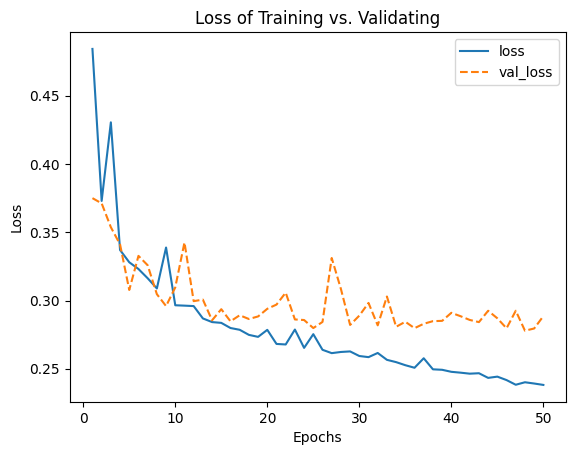

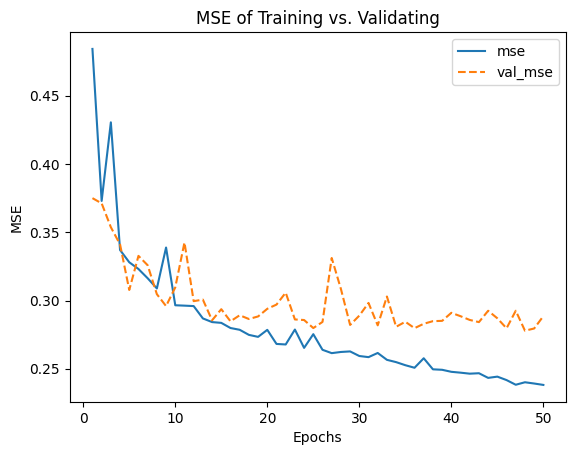

In [ ]:
# Model Adjustment
import HappyML.model_drawer as md

md.epochs_metrics_plot(epochs_metrics.history, keys=("loss", "val_loss"), title="Loss of Training vs. Validating", xyLabel=("Epochs", "Loss"))
md.epochs_metrics_plot(epochs_metrics.history, keys=("mse", "val_mse"), title="MSE of Training vs. Validating", xyLabel=("Epochs", "MSE"))

# 模型預測與評估

## 模型預測

In [ ]:
# Predict
import pandas as pd
Y_pred = pd.DataFrame(model.predict(x=X_test), index=Y_test.index, columns=Y_test.columns)

# Show the Predict Result
df = pd.concat([Y_test, Y_pred], axis=1)
print(df)

129/129 [==============================] - 0s 2ms/step
       Price     Price
19090  1.859  1.799392
8830   3.833  3.847127
4659   3.058  1.381371
1143   0.875  0.818241
9183   2.651  2.942071
...      ...       ...
170    1.250  1.687285
18420  2.593  2.689702
14525  1.696  1.474635
7084   1.847  1.821422
1312   1.647  1.932580

[4128 rows x 2 columns]


# 模型評估

In [ ]:
# Evaluation
test_loss, test_mse = model.evaluate(X_test, Y_test)
print("Loss of Testing Set:", test_loss)
print("MSE of Testing Set:", test_mse)

129/129 [==============================] - 0s 2ms/step - loss: 0.2566 - mse: 0.2566
Loss of Testing Set: 0.2566016614437103
MSE of Testing Set: 0.2566016614437103
